In [106]:
import numpy as np
import pickle
import os
import matplotlib.pyplot as plt
import sklearn
import pandas as pd
from utils.data_utils import *
from utils.model_utils import *

In [78]:
def s1():
    return np.concatenate((np.arange(-0.5,0.5,0.1),np.arange(0.5,-0.6,-0.1)))
def s2():
    return np.concatenate((np.arange(0.5,-0.5,-0.1),np.arange(-0.5,0.6,0.1)))
def s3():
    return np.array([0.5]*21)
def s4():
    return np.array([-0.5]*21)

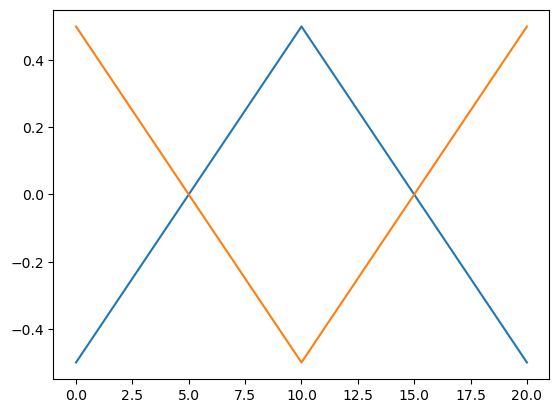

In [79]:
plt.plot(s1())
plt.plot(s2())

In [80]:
def data(s1,s2,mean = 0,input_length=1000, shapelet_length=21,std_dev = 0.05,num = 500):

    c = np.zeros((num,1,input_length))

    for i in range(num):
        starting = np.random.randint(input_length-shapelet_length)
        a = np.zeros(input_length) 
        a[starting:starting+shapelet_length] = s1
        while True:
            starting2 = np.random.randint(input_length-shapelet_length)
            if starting2<starting-shapelet_length or starting2>starting+shapelet_length:
                break
        a[starting2:starting2+shapelet_length] = s2
        a = a + np.random.normal(mean, std_dev, a.shape)

        c[i] = a.reshape(1,input_length)
    return z_normalization(c)

In [91]:
shape1 = s1()
shape2 = s2()
shape3 = s3()
shape4 = s4()

c1 = data(shape1, shape3, mean = 0,input_length=1000, shapelet_length=21,std_dev = 0.01,num = 500)
c2 = data(shape2, shape4, mean = 0,input_length=1000, shapelet_length=21,std_dev = 0.01,num = 500)
c3 = data(shape1, shape4, mean = 0,input_length=1000, shapelet_length=21,std_dev = 0.01,num = 500)
c4 = data(shape2, shape3, mean = 0,input_length=1000, shapelet_length=21,std_dev = 0.01,num = 500)
train_x, train_y = np.concatenate([c1,c2,c3,c4]), np.concatenate([[0]*1000,[1]*1000])

In [ ]:
plt.plot(c1[0].flatten(),label='c1')
plt.plot(c2[0].flatten(),label='c2')
plt.plot(c3[0].flatten(),label='c3')
plt.plot(c4[0].flatten(),label='c4')
plt.legend()

In [92]:
c1 = data(shape1, shape3, mean = 0,input_length=1000, shapelet_length=21,std_dev = 0.01,num = 500)
c2 = data(shape2, shape4, mean = 0,input_length=1000, shapelet_length=21,std_dev = 0.01,num = 500)
c3 = data(shape1, shape4, mean = 0,input_length=1000, shapelet_length=21,std_dev = 0.01,num = 500)
c4 = data(shape2, shape3, mean = 0,input_length=1000, shapelet_length=21,std_dev = 0.01,num = 500)
test_x, test_y = np.concatenate([c1,c2,c3,c4]), np.concatenate([[0]*1000,[1]*1000])

In [93]:
enc1 = sklearn.preprocessing.OneHotEncoder(sparse_output=False).fit(train_y.reshape(-1, 1))
train_y = enc1.transform(train_y.reshape(-1, 1))
test_y = enc1.transform(test_y.reshape(-1, 1))
data = {
    'train_x': train_x,
    'test_x': test_x,
    'train_y': train_y,
    'test_y': test_y
}

model_dataset_path = 'models/simu1'

if not os.path.exists(model_dataset_path):
    os.makedirs(model_dataset_path)

with open(model_dataset_path+'/data.pkl', 'wb') as f:
    pickle.dump(data, f)


In [102]:
from tsai.models.FCN import FCN
model = FCN(c_in=1, c_out=2)
device = 'cuda'

In [107]:
train_loader, test_loader = generate_loader(train_x, test_x, train_y, test_y, batch_size_train=128, batch_size_test=32)
fit(model, train_loader, device=device, num_epochs=100)
torch.save(model.state_dict(), f'{model_dataset_path}/weight.pt')
test_preds, ground_truth = get_all_preds(model, test_loader, device=device)
ground_truth = np.argmax(ground_truth, axis=1)
np.save(f'{model_dataset_path}/test_preds.npy', np.array(test_preds))
acc = accuracy_score(ground_truth, test_preds)
print(f'acc:{acc:.3f}')
a = classification_report(ground_truth, test_preds, output_dict=True)
dataframe = pd.DataFrame.from_dict(a)
dataframe.to_csv(f'{model_dataset_path}/classification_report.csv', index=False)

  0%|          | 0/100 [00:00<?, ?it/s]

acc:1.000
